In [1]:
#Importing required libraries for building models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]

from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Reading data 

data = pd.read_csv(r'C:\Users\SKothapally\Downloads\10MAY2018\bank-additional\bank-additional\bank-additional-full.csv',
                  sep = ';')

In [3]:
#Taking a peek at data

data.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Prima facie the above sample we learn that there are no missing values,10 numeric variables, rest categorical variables with y being the output variable. We will confirm the missing values again in next few steps of our Data Cleaning and Data Preparation steps.

In [4]:
#Looking at the dimensions of the dataset (# of rows, # of columns)

data.shape

(41188, 21)

In [5]:
#Getting the count of missing values in each column

missing_values_count = data.isnull().sum()
print(missing_values_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Confirming that there are no missing values in the dataset.

In [6]:
#Learning about the features using the data dictionary created from the bank-additional-names.txt provided with the dataset

data_dictionary = pd.read_csv(r'C:/Users/SKothapally/Downloads/10MAY2018/bank-additional/bank-additional/Data-dictionary.csv')

print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

21
['Column', 'Description']


In [7]:
#Changing Data dictionary column names to merge it with main data set 'data'
data_dictionary.head()
data_dictionary = data_dictionary.rename(columns = {'Column': 'name', 'Description': 'description'})

In [8]:
#Merging data and Data Dictionary to learn about the variables

data_dtypes = pd.DataFrame(data.dtypes,columns=['dtypes'])
data_dtypes = data_dtypes.reset_index()
data_dtypes['name'] = data_dtypes['index']
data_dtypes = data_dtypes[['name','dtypes']]
data_dtypes['first value'] = data.loc[0].values
preview = data_dtypes.merge(data_dictionary, on='name',how='left')
print(preview)

              name   dtypes  first value  \
0              age    int64           56   
1              job   object    housemaid   
2          marital   object      married   
3        education   object     basic.4y   
4          default   object           no   
5          housing   object           no   
6             loan   object           no   
7          contact   object    telephone   
8            month   object          may   
9      day_of_week   object          mon   
10        duration    int64          261   
11        campaign    int64            1   
12           pdays    int64          999   
13        previous    int64            0   
14        poutcome   object  nonexistent   
15    emp.var.rate  float64          1.1   
16  cons.price.idx  float64       93.994   
17   cons.conf.idx  float64        -36.4   
18       euribor3m  float64        4.857   
19     nr.employed  float64         5191   
20               y   object           no   

                               

# Removing Columns that are not required

We can remove the below columns from the dataset based on the description of the columns provided 

1. month : last contact month of the year
2. day_of_week : last contact day of the week
3. duration : duration of the call, this is important but we can't use this for prediction as every customer is unique 
4. nr.employed : number of employees (assuming the number of employees in the bank which is irrelevant in predicting the            outcome 
              

In [9]:
#dropping the aove 4 columns

drop_cols = ['month','day_of_week','duration','nr.employed']
data = data.drop(drop_cols, axis =1)

In [10]:
#New shape of data set

print(data.shape)

(41188, 17)


In [11]:
#Number of object variables

print("Data types and their frequency:\n{}".format(data.dtypes.value_counts()))

Data types and their frequency:
object     9
int64      4
float64    4
dtype: int64


In [12]:
#select only columns with object data type and list the columns 

object_columns_df = data.select_dtypes(include = ['object'])
print(object_columns_df.iloc[0])

job            housemaid
marital          married
education       basic.4y
default               no
housing               no
loan                  no
contact        telephone
poutcome     nonexistent
y                     no
Name: 0, dtype: object


In [13]:
#Exploring unique values in categorical columns

for name in object_columns_df:
    print(name, ':')
    print(object_columns_df[name].value_counts(),'\n')

job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing :
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan :
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact :
cellular     26144
telephon

# Exploring data using Visualization

In [14]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013FD5320>,
      dtype=object)

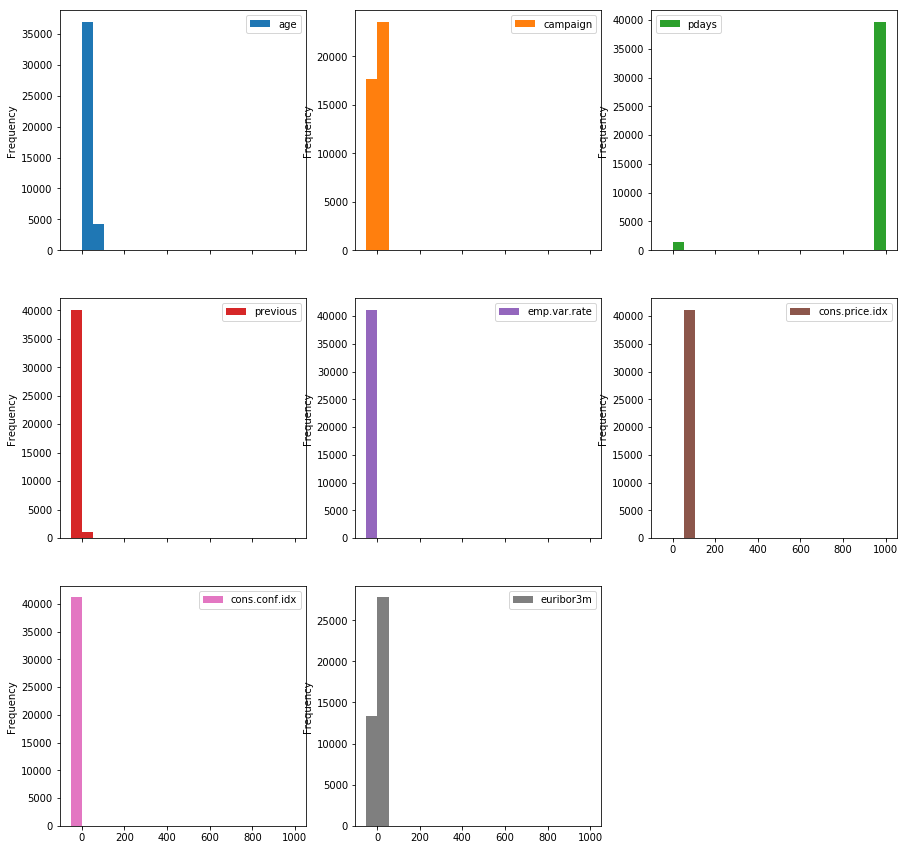

In [15]:
#Plotting histograms to learn the data distribution for all numeric columns


data.plot(kind = 'hist' ,grid = 'false', subplots = True, layout = (3,3),figsize = (15,15), bins = 20)


From the initial plots we see exponential data ditribution, plotting more to confirm this


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001518A0F0>,
      dtype=object)

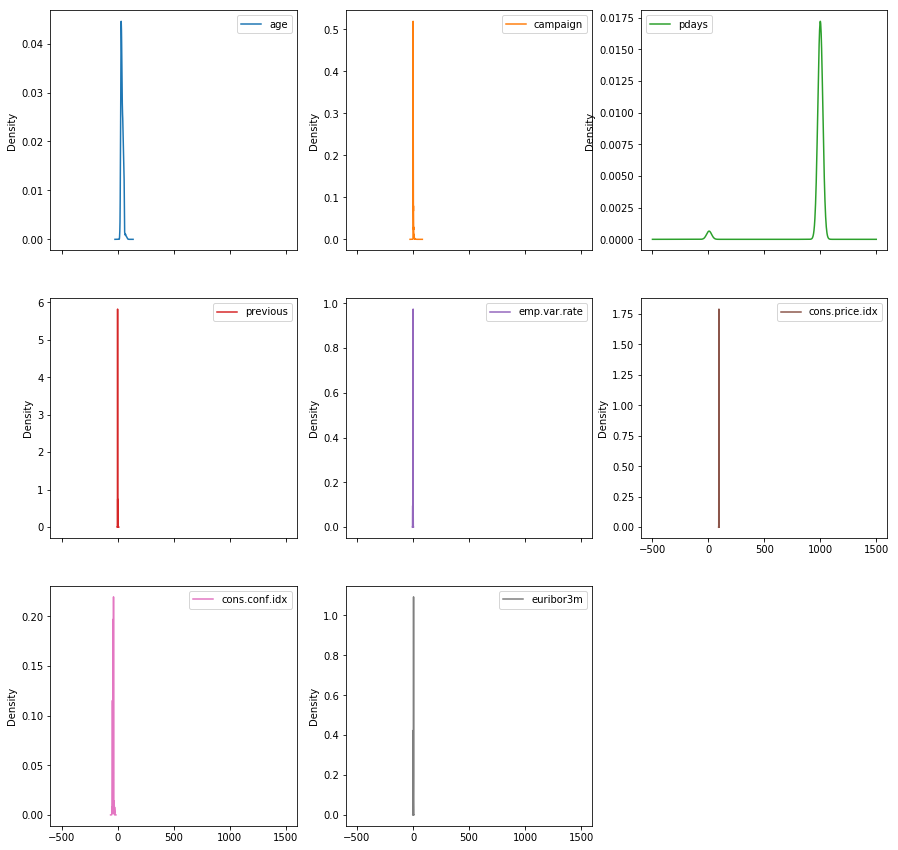

In [16]:
# Density plots to check if distribution is normal or exponential


data.plot(kind = 'density' ,grid = 'false', subplots = True, layout = (3,3),figsize = (15,15))

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
campaign          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pdays             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
previous             AxesSubplot(0.125,0.391471;0.227941x0.222059)
emp.var.rate      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
cons.price.idx    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
cons.conf.idx           AxesSubplot(0.125,0.125;0.227941x0.222059)
euribor3m            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

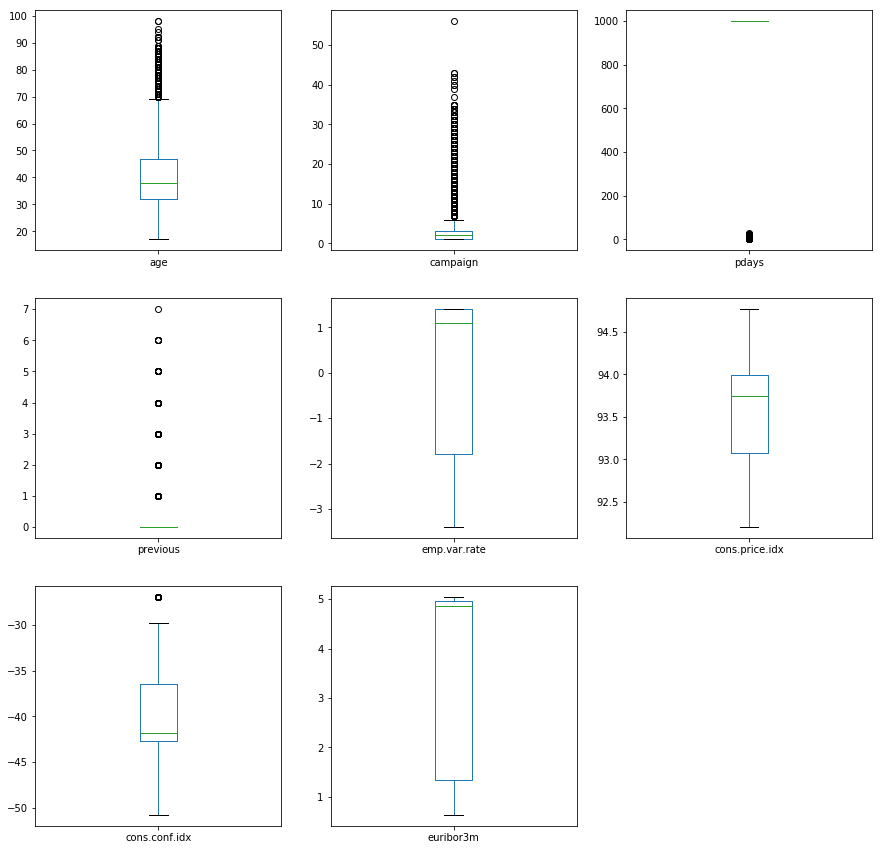

In [17]:
#Checking for outliers using box and whisket plots

data.plot(kind = 'box' ,grid = 'false', subplots = True, layout = (3,3),figsize = (15,15))

From the above plots we can deduce the following about the data

    1. Data ditribution is not normal and needs normalization
    2. Some of the dependent variables like pdays, campaign , age ,previous have outliers we can either drop these             columns or normalize the data and re plot all dependednt variables to see the distribution.
    3. The data requires normalization.

In [18]:
#Normalizing the dependent variables 

num_cols = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = MinMaxScaler(feature_range=(0, 1))

data[num_cols] = scaler.fit_transform(data[num_cols])

In [19]:
print(data.head())

        age        job  marital    education  default housing loan    contact  \
0  0.481481  housemaid  married     basic.4y       no      no   no  telephone   
1  0.493827   services  married  high.school  unknown      no   no  telephone   
2  0.246914   services  married  high.school       no     yes   no  telephone   
3  0.283951     admin.  married     basic.6y       no      no   no  telephone   
4  0.481481   services  married  high.school       no      no  yes  telephone   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0       0.0    1.0       0.0  nonexistent        0.9375        0.698753   
1       0.0    1.0       0.0  nonexistent        0.9375        0.698753   
2       0.0    1.0       0.0  nonexistent        0.9375        0.698753   
3       0.0    1.0       0.0  nonexistent        0.9375        0.698753   
4       0.0    1.0       0.0  nonexistent        0.9375        0.698753   

   cons.conf.idx  euribor3m   y  
0        0.60251   0.957379 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018167240>,
      dtype=object)

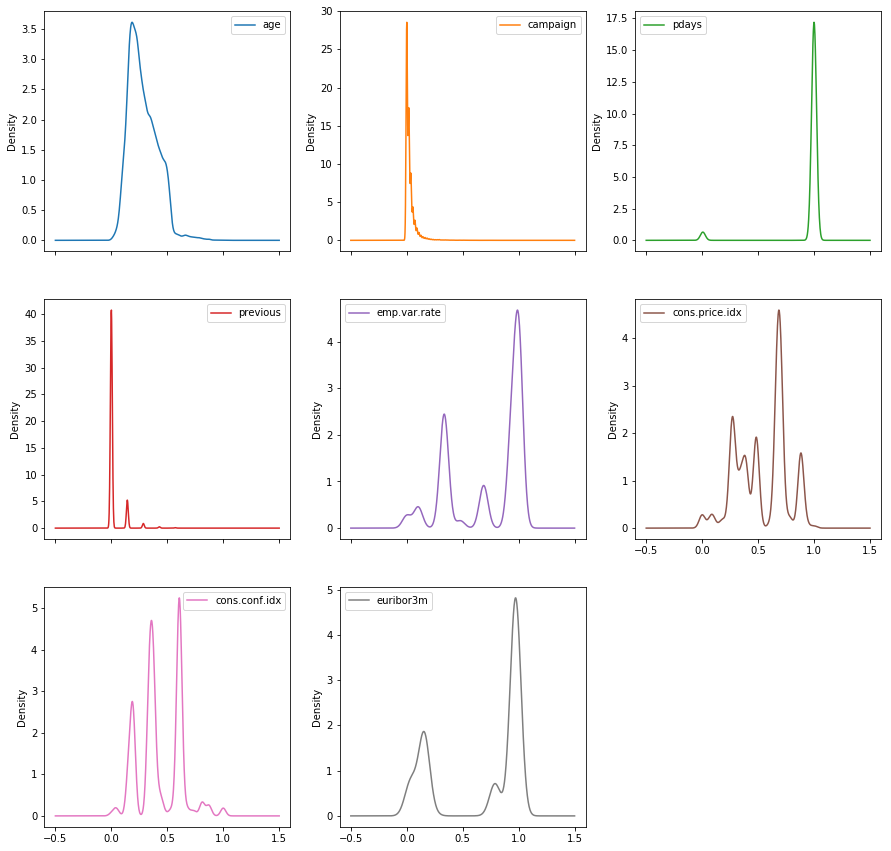

In [20]:
#Checking distributions again after normalizing the data

data.plot(kind = 'density' ,grid = 'false', subplots = True, layout = (3,3),figsize = (15,15))

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
campaign          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pdays             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
previous             AxesSubplot(0.125,0.391471;0.227941x0.222059)
emp.var.rate      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
cons.price.idx    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
cons.conf.idx           AxesSubplot(0.125,0.125;0.227941x0.222059)
euribor3m            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

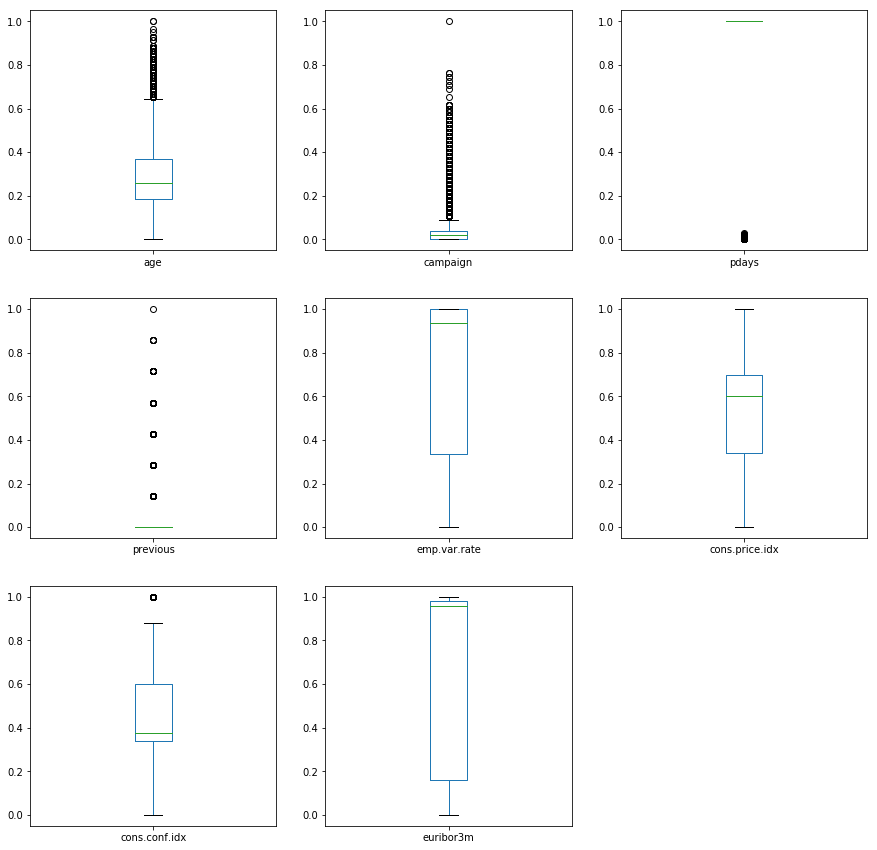

In [21]:
#Checking for outliers

data.plot(kind = 'box' ,grid = 'false', subplots = True, layout = (3,3),figsize = (15,15))

# Converting object type variables to numeric

In [22]:
# Converting colums to numeric

nominal_columns = ['job','marital','education','default','housing','loan','contact','poutcome']
dummy_df = pd.get_dummies(data[nominal_columns])
data = pd.concat([data,dummy_df], axis = 1)
data = data.drop(nominal_columns, axis = 1)

In [23]:
data.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
24109,0.197531,0.000000,1.0,0.000000,0.687500,0.389322,0.368201,0.818635,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
40292,0.209877,0.036364,1.0,0.142857,0.354167,0.784879,0.439331,0.060077,yes,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0
34634,0.271605,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0
8529,0.271605,0.054545,1.0,0.000000,1.000000,0.882307,0.376569,0.958966,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
4696,0.259259,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957606,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
34735,0.172840,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
26594,0.197531,0.018182,1.0,0.000000,0.687500,0.389322,0.368201,0.780322,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
13134,0.172840,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.981183,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
36218,0.283951,0.018182,1.0,0.000000,0.333333,0.269680,0.192469,0.144185,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
5125,0.160494,0.054545,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0


In [24]:
data['pdays'].value_counts()

1.000000    39673
0.003003      439
0.006006      412
0.004004      118
0.009009       64
0.002002       61
0.007007       60
0.012012       58
0.010010       52
0.005005       46
0.013013       36
0.011011       28
0.001001       26
0.015015       24
0.014014       20
0.008008       18
0.000000       15
0.016016       11
0.017017        8
0.018018        7
0.019019        3
0.022022        3
0.021021        2
0.027027        1
0.020020        1
0.026026        1
0.025025        1
Name: pdays, dtype: int64

In [25]:
#dropping pdays as most the records have 999 which according to data set description is missing information

cols=['pdays']
data = data.drop(cols, axis = 1)

In [26]:
data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,0.493827,0.0,0.0,0.9375,0.698753,0.60251,0.957379,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,0.246914,0.0,0.0,0.9375,0.698753,0.60251,0.957379,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,0.283951,0.0,0.0,0.9375,0.698753,0.60251,0.957379,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0


In [27]:
#Descriptive statistics after data transformation

data.describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.284248,0.028502,0.024709,0.725393,0.535723,0.430854,0.677237,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.103234,0.863431,0.033335
std,0.128657,0.050364,0.070700,0.327283,0.225581,0.193648,0.393210,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.304268,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,0.018182,0.000000,0.937500,0.603274,0.376569,0.957379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,0.036364,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [28]:
#Converting output variable 'y' to 1 and 0 as this is a binary classification problem

mapping_dict = {"y":
               {"no":0,
                "yes":1                   
               }}
data = data.replace(mapping_dict)

In [29]:
data.describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.284248,0.028502,0.024709,0.725393,0.535723,0.430854,0.677237,0.112654,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.103234,0.863431,0.033335
std,0.128657,0.050364,0.070700,0.327283,0.225581,0.193648,0.393210,0.316173,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.304268,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,0.018182,0.000000,0.937500,0.603274,0.376569,0.957379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,0.036364,0.000000,1.000000,0.698753,0.602510,0.980957,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [30]:
print(data.shape)


(41188, 46)


In [31]:
# Split-out validation dataset

X = data[['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']]
Y = data['y']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [32]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Models

We use a combination of linear and non-linear models like Linear Regression, KNN, Decision Trees, SVM and spot check based on accuracy. The highest acccuracy models are picked and then tuned to optimize predictions.

In [35]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [36]:
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.898361 (0.005915)
KNN: 0.888255 (0.004294)
CART: 0.839605 (0.007758)
NB: 0.674234 (0.048002)
SVM: 0.896844 (0.005247)


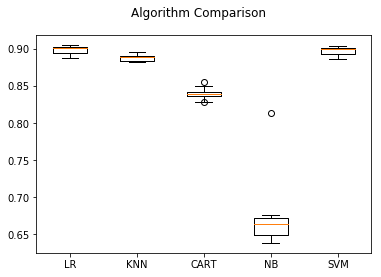

In [37]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the above plots Linear Regression, KNN and SVM seem promising models

In [38]:
#Tuning KNN

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.896297 using {'n_neighbors': 21}
0.843460 (0.005809) with: {'n_neighbors': 1}
0.879757 (0.005391) with: {'n_neighbors': 3}
0.888255 (0.004294) with: {'n_neighbors': 5}
0.890744 (0.004172) with: {'n_neighbors': 7}
0.892595 (0.005399) with: {'n_neighbors': 9}
0.893900 (0.004809) with: {'n_neighbors': 11}
0.894112 (0.004993) with: {'n_neighbors': 13}
0.894810 (0.005385) with: {'n_neighbors': 15}
0.895478 (0.005426) with: {'n_neighbors': 17}
0.895690 (0.005244) with: {'n_neighbors': 19}
0.896297 (0.005825) with: {'n_neighbors': 21}


In [39]:
#Tuning SVM

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.896904 using {'C': 1.7, 'kernel': 'sigmoid'}
0.896844 (0.005247) with: {'C': 0.1, 'kernel': 'linear'}
0.886646 (0.005974) with: {'C': 0.1, 'kernel': 'poly'}
0.896844 (0.005247) with: {'C': 0.1, 'kernel': 'rbf'}
0.895690 (0.007085) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.896844 (0.005247) with: {'C': 0.3, 'kernel': 'linear'}
0.886646 (0.005974) with: {'C': 0.3, 'kernel': 'poly'}
0.896844 (0.005247) with: {'C': 0.3, 'kernel': 'rbf'}
0.896844 (0.005247) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.896844 (0.005247) with: {'C': 0.5, 'kernel': 'linear'}
0.886646 (0.005974) with: {'C': 0.5, 'kernel': 'poly'}
0.896844 (0.005247) with: {'C': 0.5, 'kernel': 'rbf'}
0.896844 (0.005247) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.896844 (0.005247) with: {'C': 0.7, 'kernel': 'linear'}
0.886646 (0.005974) with: {'C': 0.7, 'kernel': 'poly'}
0.896844 (0.005247) with: {'C': 0.7, 'kernel': 'rbf'}
0.896844 (0.005247) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.896844 (0.005247) with: {'C': 0.9, 'kernel': 'lin

After tuning both KNN and SVM both models predict and accuracy of 89.6, we will chose KNN here because KNN takes less training time than SVM

In [40]:
# prepare the final model with KNN (21 neighbors)

model = KNeighborsClassifier(n_neighbors = 21)
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset

predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8957271182325808
[[7243   90]
 [ 769  136]]
             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7333
          1       0.60      0.15      0.24       905

avg / total       0.87      0.90      0.87      8238



89.5% of accuracy is being achieved using non linear model KNN